In [2]:
from bpd.io import load_dataset
import matplotlib.pyplot as plt 
import numpy as np 
import jax.numpy as jnp
from jax.scipy import stats

In [3]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ["JAX_PLATFORMS"] = "cpu"
os.environ["JAX_ENABLE_X64"] = "True"


# Shear

In [4]:
pfpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp73_51/shear_samples_512_plus.npz"
mfpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp73_51/shear_samples_512_minus.npz"

In [5]:
dsp = load_dataset(pfpath)
dsm = load_dataset(mfpath)

In [6]:
dsp.keys(), dsp['samples'].keys()

(dict_keys(['samples', 'truth']),
 dict_keys(['g1', 'g2', 'a_logflux', 'mean_logflux', 'mean_loghlr', 'sigma_e', 'sigma_logflux', 'sigma_loghlr']))

In [7]:
g1p = dsp['samples']['g1']
g1m = dsm['samples']['g1']
g1m.shape

(3000,)

In [55]:
g1p.mean(), g1p.std()

(np.float64(0.020540975134959158), np.float64(0.0003271900937752931))

In [8]:
g1p.std() / 0.02 

np.float64(0.016359504688764653)

In [56]:
g2p = dsp['samples']['g2']
g2m = dsm['samples']['g2']
g2m.shape

(3000,)

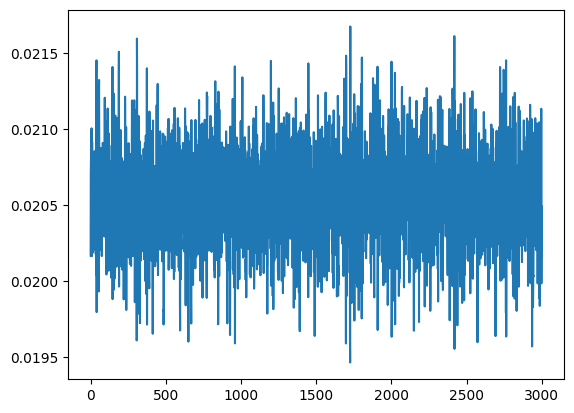

In [57]:
plt.plot(g1p)

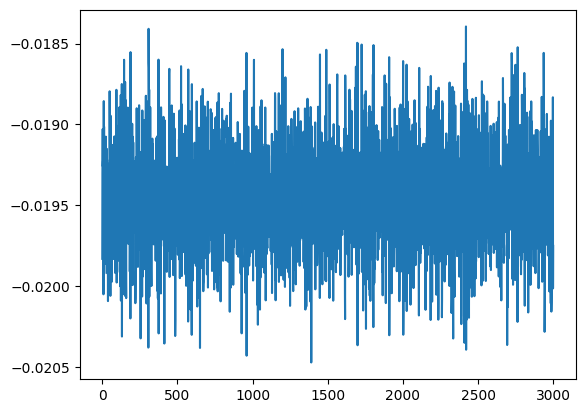

In [58]:
plt.plot(g1m)

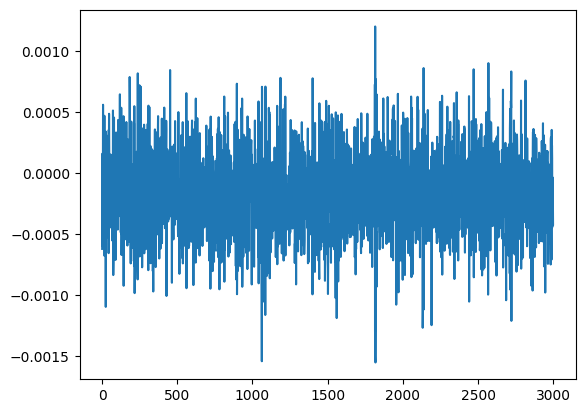

In [59]:
plt.plot(g2m)

In [61]:
m = (g1p.mean() - g1m.mean()) / 2 / 0.02 - 1
c = (g2p.mean() + g2m.mean()) / 2
m/1e-3, c/1e-3

(np.float64(-0.3130202324510556), np.float64(-0.15972410531084189))

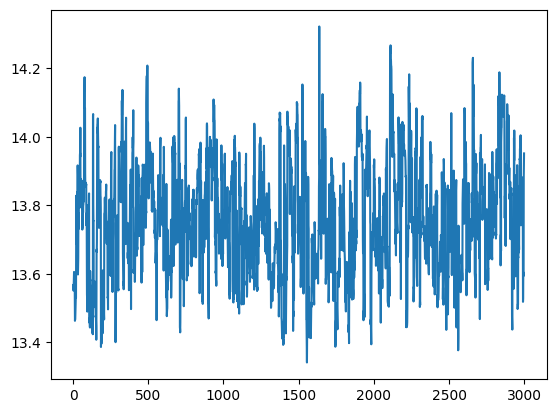

In [62]:
# trace plots of other parameters
plt.plot(dsp['samples']['a_logflux'])

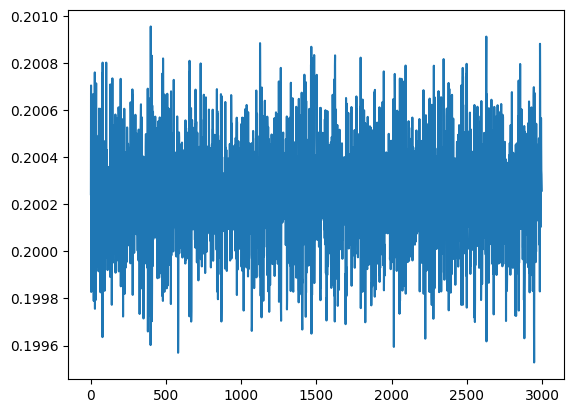

In [63]:
plt.plot(dsm['samples']['sigma_e'])

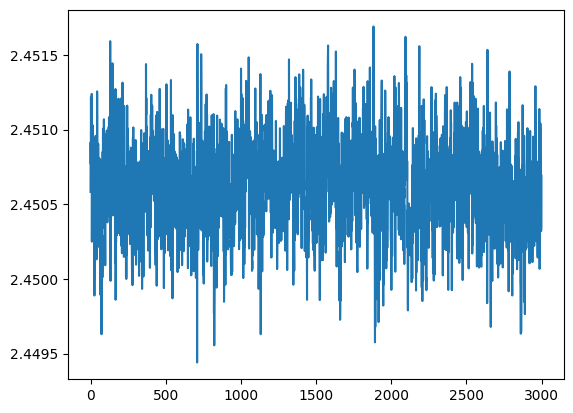

In [64]:
plt.plot(dsm['samples']['mean_logflux'])

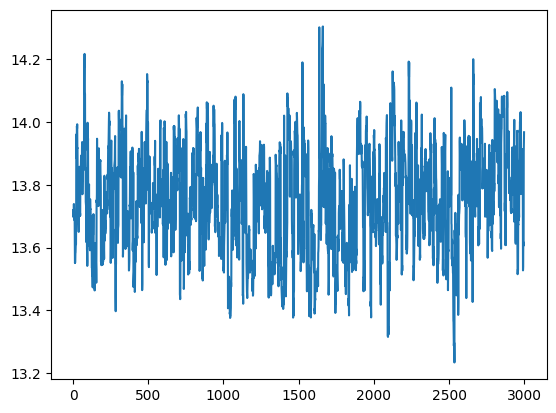

In [65]:
plt.plot(dsm['samples']['a_logflux'])

In [67]:
dsp['samples']['a_logflux'].mean(), dsp['samples']['a_logflux'].std(), dsm['samples']['a_logflux'].mean(), dsm['samples']['a_logflux'].std()

(np.float64(13.757954270328858),
 np.float64(0.16581300098234616),
 np.float64(13.750587943003286),
 np.float64(0.1653989526610737))

# Alternative method of estimating errors

In [3]:
from bpd.io import load_dataset
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp73_51/g_samples_514_errs_514.npz"

In [5]:
ds = load_dataset(fpath)

In [6]:
gps = ds['plus']['g']
gps.shape

(500, 1000, 2)

In [7]:
gms = ds['minus']['g']
gms.shape

(500, 1000, 2)

In [8]:
ms = (gps.mean(1)[:, 0] - gms.mean(1)[:, 0]) / 2/ 0.02  - 1
cs = (gps.mean(1)[:, 0] + gms.mean(1)[:, 0]) / 2
ms.shape, cs.shape

((500,), (500,))

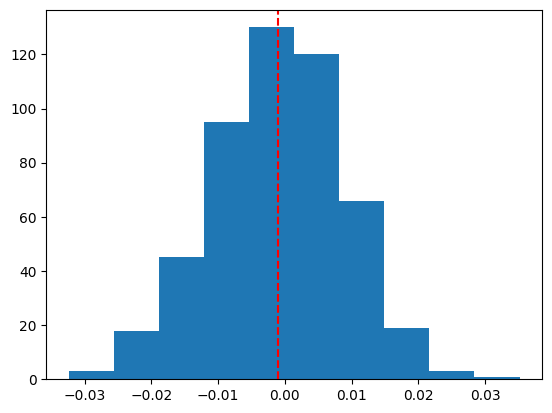

In [9]:
plt.hist(ms)
# plt.axvline(m, c='k', ls='--')
plt.axvline(ms.mean(), c='r', ls='--')

In [11]:
ms.mean()

np.float64(-0.0009729053249092547)

In [12]:
ms.std() / np.sqrt(len(ms))

np.float64(0.0004436947738083202)

In [20]:
cs.mean(), cs.std() / np.sqrt(len(cs)) / 1e-3

(np.float64(0.000542683235354397), np.float64(0.34329362471068214))

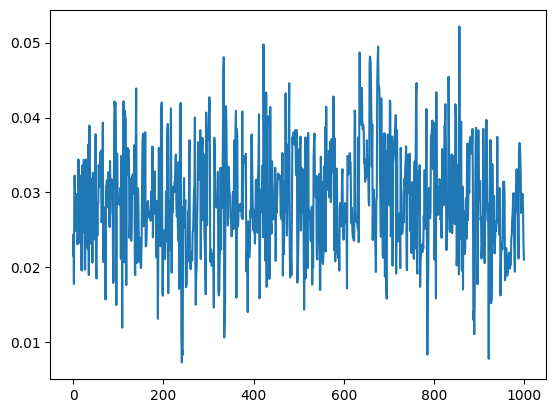

In [14]:
plt.plot(gps[127][:, 0])

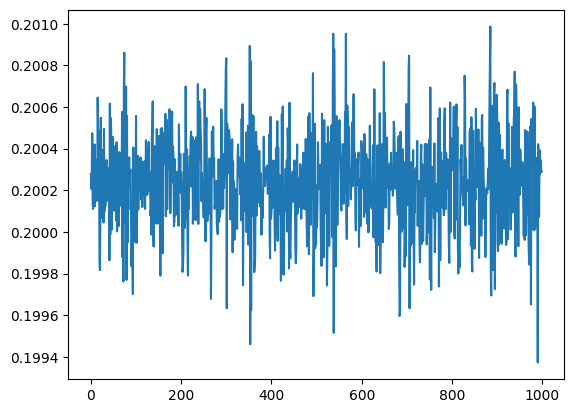

In [15]:
plt.plot(ds['minus']['sigma_e'][127])

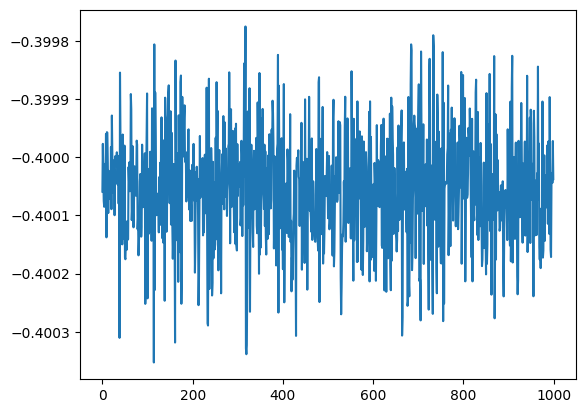

In [16]:
plt.plot(ds['minus']['mean_loghlr'][127])

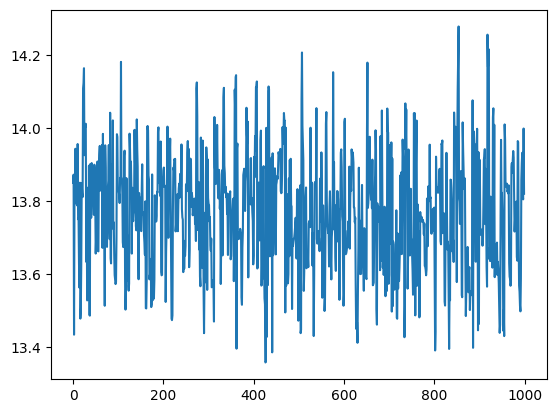

In [17]:
plt.plot(ds['plus']['a_logflux'][127])